### Problem 1.1. Distribution of money

The distribution of income in a society $f(m)$ behaves as $f(m) ∝ m^{−1−α}$ , where m is the income
(money) and the exponent α is between 1 and 2. The quantity $f(m)$ can be taken to be the
number of people who have an amount of money between $m$ and $m + ∆m$. This power law
behavior of the income distribution is often referred to as Pareto’s law or the 80/20 rule (20%
of the people have 80% of the income) and was proposed in the late 1800’s by Vilfredo Pareto,
an economist and sociologist. In the following, we consider some simple models of a closed
economy to determine the relation between the microdynamics and the resulting macroscopic
distribution of money

(a) Suppose that N agents (people) can exchange money in pairs. For simplicity, we assume
that all the agents are initially assigned the same amount of money $m0$, and the agents are
then allowed to interact. At each time step, a pair of agents $i$ and $j$ with money $m_i$ and $m_j$
is randomly chosen and a transaction takes place. Again for simplicity, let us assume that
$m_i → m_i'$
and $m_j → m_j'$
by a random reassignment of their total amount of money, $m_i + m_j$
,
such that

$m_i'=\epsilon (m_i + m_j)$ (1.1a)

$m_j'=(1-\epsilon)(m_i + m_j)$ (1.1b)

where $\epsilon$ is a random number between 0 and 1. Note that this reassignment ensures that the
agents have no debt after the transaction, that is, they are always left with an amount $m$ ≥ 0.
Simulate this model and determine the distribution of money among the agents after the
system has relaxed to an equilibrium state. Choose $N$ = 100 and $m_0$ = 1000.

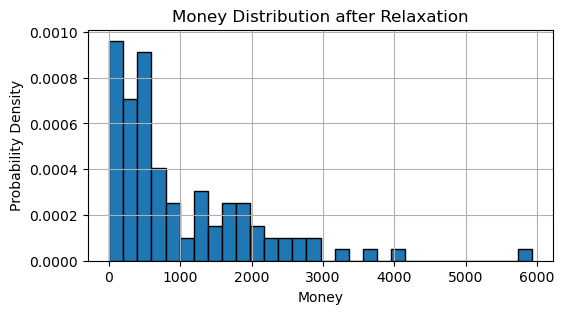

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

N = 100
m0 = 1000
m = [m0] * N

for q in range(0, 1000000):
    eps = random.random()
    i = random.randint(0, N-1)
    j = random.randint(0, N-1)
    if i == j:
        continue
    total = m[i] + m[j]
    m[i] = eps * total
    m[j] = (1-eps) * (total)

plt.figure(figsize=(6, 3))
plt.hist(m, bins=30, density=True, edgecolor='black')
plt.title("Money Distribution after Relaxation")
plt.xlabel("Money")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()

(b) Now let us ask what happens if the agents save a fraction λ of their money before the transaction. We write

$m_i' = m_i + \delta m$ (1.2a)

$m_j' = m_j − \delta m$ (1.2b)

$\delta m = (1 − λ)[\epsilon m_j − (1 − \epsilon)m_i ]$ (1.2c)

Modify your program so that this savings model is implemented. Consider λ = 0.25, 0.50,
0.75, and 0.9. For some of the values of λ, as many as $10^7$ transactions will need to be
considered. Does the form of $f(m)$ change for λ > 0?

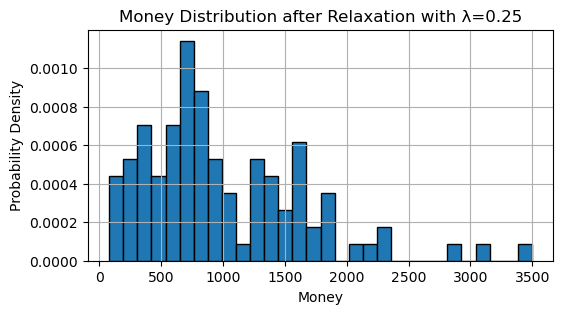

λ=0.25
Mean: 999.9999999999993
Variance: 435157.55850601173
Standard Deviation: 659.6647318949314
Skewness: 1.2233470320107958



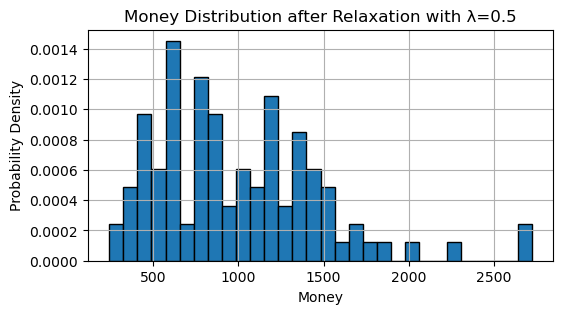

λ=0.5
Mean: 1000.0000000000009
Variance: 233330.26110213352
Standard Deviation: 483.04271146776813
Skewness: 1.0432695138316963



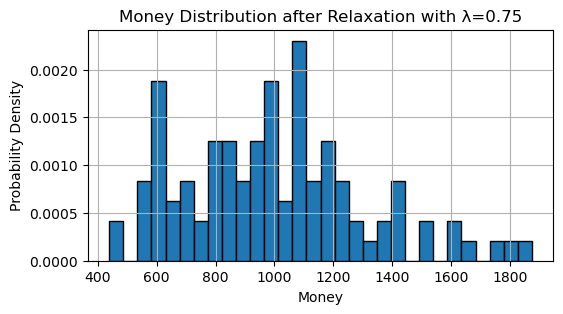

λ=0.75
Mean: 999.9999999999989
Variance: 95764.13096011605
Standard Deviation: 309.4578015822449
Skewness: 0.5636427196028528



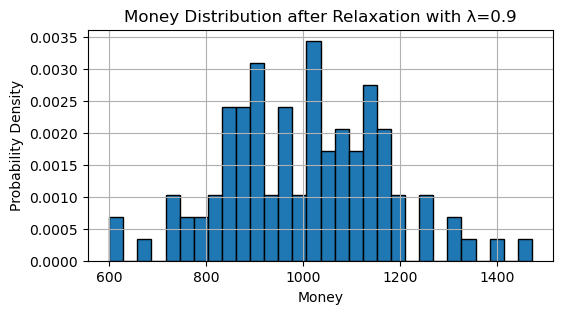

λ=0.9
Mean: 999.999999999999
Variance: 26997.387371644993
Standard Deviation: 164.30881708430925
Skewness: 0.1587096534403034



In [11]:
for lam in [0.25, 0.50, 0.75, 0.9]:
    N = 1000
    m0 = 1000
    m = [m0] * N

    for q in range(0, 1000000):
        eps = random.random()
        i = random.randint(0, N-1)
        j = random.randint(0, N-1)
        if i == j:
            continue
        total = m[i] + m[j]
        delta_m = (1 - lam) * (eps * m[j] - (1 - eps) * m[i])
        m[i] += delta_m
        m[j] -= delta_m

    plt.figure(figsize=(6, 3))
    plt.hist(m, bins=30, density=True, edgecolor='black')
    plt.title(f"Money Distribution after Relaxation with λ={lam}")
    plt.xlabel("Money")
    plt.ylabel("Probability Density")
    plt.grid(True)
    plt.show()
    # print the mean, variance, standard deviation, and skewness
    print(f"λ={lam}")
    print(f"Mean: {np.mean(m)}")
    print(f"Variance: {np.var(m)}")
    print(f"Standard Deviation: {np.std(m)}")
    print(f"Skewness: {np.mean((m - np.mean(m))**3) / np.mean((m - np.mean(m))**2)**1.5}")
    print()

It can be seen that as lambda increases (the money saved by the agents), the distribution of money among the agents becomes more normal.  The range of money held also decreases as lambda increases.